In [ ]:
# GET THE FAST_TEXT words: https://www.kaggle.com/datasets/takaishikawa/fasttext-pretrained-crawl-vector-en-bin 
# It is not small: 4G. 

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print("Imports are ok")



Imports are ok


In [29]:

# Define a list of hat product descriptions
product_descriptions = ['This is a baseball cap made of cotton with an adjustable strap.',
                        'This is a fedora made of wool with a wide brim and a ribbon band.',
                        'This is a beanie made of acrylic with a pom-pom on top.',
                        'This is a cowboy hat made of leather with a curved brim and a chin strap.',
                        'This is a visor made of polyester with an elastic band.',
                        'This is a bucket hat made of denim with a flat top and a floppy brim.',
                        'This is a top hat made of silk with a tall cylindrical crown and a wide flat brim.']

# Load the FastText model (you may need to download the model first)

# fasttext.util.download_model('en', if_exists='ignore')  # English
# model = fasttext.load_model('/Users/pmontgomery/FAST_TEXT_WORDS/cc.en.300.bin')
print("Loaded the model ( Wait till this is done before the next step - might take some time )")


Loaded the model


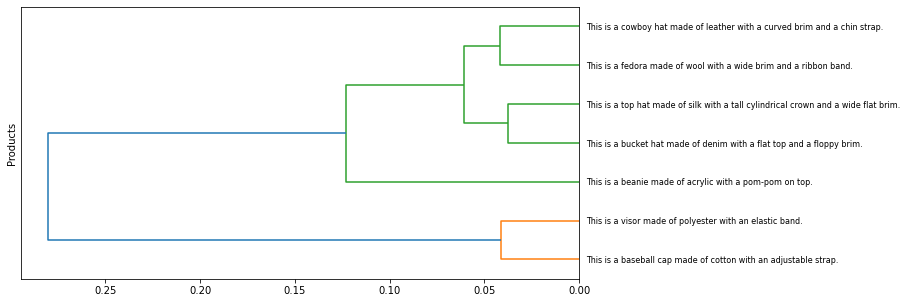

In [34]:

#model = fasttext.load_model('cc.en.300.bin')

# Embed the product descriptions as vectors
vectors = []
for text in product_descriptions:
    vector = np.mean([model.get_word_vector(word.lower()) for word in text.split()], axis=0)
    vectors.append(vector)

# Calculate cosine similarities between vectors
similarity_matrix = cosine_similarity(vectors)

# Perform hierarchical clustering
Z = linkage(similarity_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=product_descriptions, orientation='left', leaf_font_size=8)
plt.ylabel('Products')
plt.show()